In [1]:
import sys
sys.path.append("../..")


from experiments.plt_pab_fae import plt_fab_fae
from protocol.BB84EveTrainableProtocol import BB84EveTrainableProtocol
from protocol.BB84TrainableProtocol import BB84TrainableProtocol
from protocol.connection_elements.Layer import SeparableLayer, EntangledLayer
from protocol.BB84Protocol import BB84Protocol
from protocol.connection_elements.MultiQubitQCLEve import MultiQubitQCLEve


No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit/circuit/quantumcircuit.py:3428: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  return circuit_drawer(


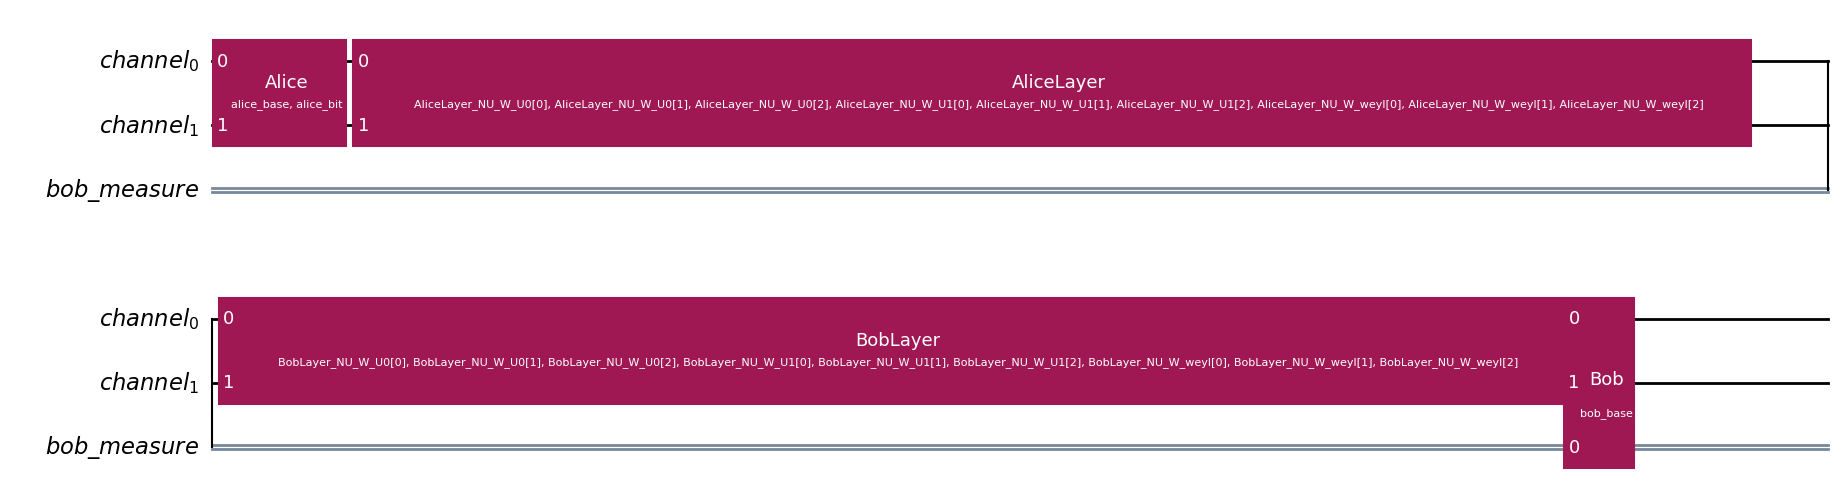

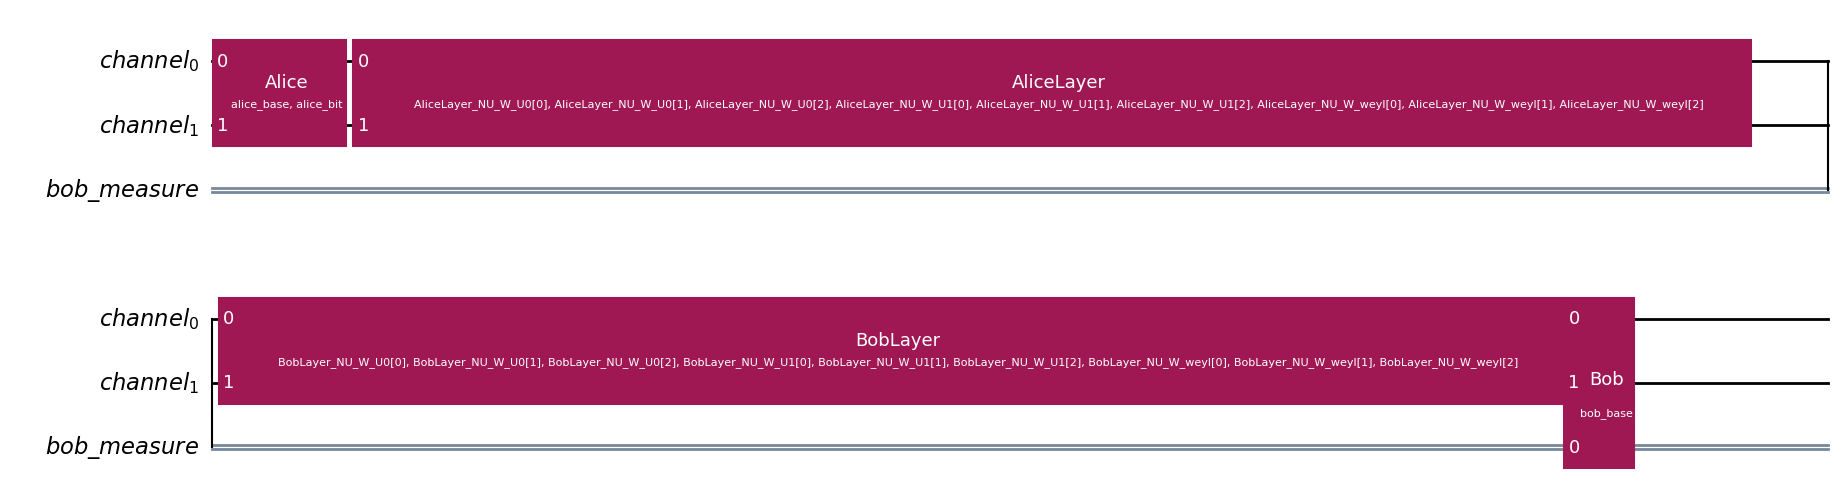

In [2]:
layers = [EntangledLayer("AliceLayer"), EntangledLayer("BobLayer")]
eve = MultiQubitQCLEve()

ab_protocol = BB84TrainableProtocol(n_bits=512, elements=layers, channel_size=2, seed=0, learning_rate=0.1)
eve_protocol = BB84EveTrainableProtocol(n_bits=512, elements=[layers[0], eve, layers[1]], channel_size=2,
                                        seed=0, alpha=1)

qc, _ = ab_protocol.qc_with_ctx()
qc.draw("mpl", expr_len=3)

In [3]:
def train_eve():
    bob_qber, eve_qber = [], []
    qber = eve_protocol.run()
    bob_qber.append(qber['bob_qber'])
    eve_qber.append(qber['eve_qber'])
    print(f'start QBER: {qber}')
    for epoch in range(50):
        loss = eve_protocol.train()
        qber = eve_protocol.run()
        bob_qber.append(qber['bob_qber'])
        eve_qber.append(qber['eve_qber'])
        if epoch % 5 == 0 or epoch == 49:
            print(f'epoch: {epoch}, loss: {loss}, QBER: {qber}')
    return bob_qber, eve_qber

def train_ab():
    bob_qber, eve_qber = [], []
    qber = ab_protocol.run()
    bob_qber.append(qber['bob_qber'])
    eve_qber.append(0.5)
    print(f'start QBER: {qber}')
    for epoch in range(20):
        loss = ab_protocol.train()
        qber = ab_protocol.run()
        bob_qber.append(qber['bob_qber'])
        eve_qber.append(0.5)
        if epoch % 5 == 0 or epoch == 19:
            print(f'epoch: {epoch}, loss: {loss}, QBER: {qber}')
    return bob_qber, eve_qber

# Krok 1 - trenowanie Alice i Boba do początkowego stanu
Uczymy Alice i Boba bez Eve, aby miały sensowne parametry początkowe i potrafiły przekazywać sobie dane.

In [4]:
b_q, e_q = train_ab()

start QBER: {'bob_qber': np.float64(0.44047619047619047)}
epoch: 0, loss: -0.5646201372146606, QBER: {'bob_qber': np.float64(0.23015873015873012)}
epoch: 5, loss: -0.9129896759986877, QBER: {'bob_qber': np.float64(0.059523809523809534)}
epoch: 10, loss: -0.9726959466934204, QBER: {'bob_qber': np.float64(0.04365079365079361)}
epoch: 15, loss: -0.9603708982467651, QBER: {'bob_qber': np.float64(0.023809523809523836)}
epoch: 19, loss: -0.9920908808708191, QBER: {'bob_qber': np.float64(0.007936507936507908)}


<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

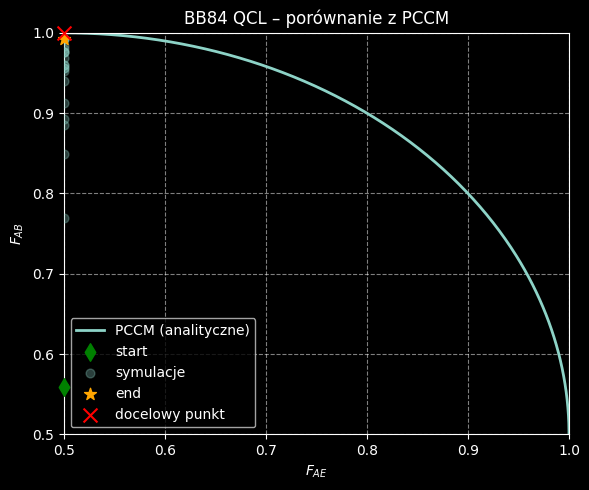

In [5]:
plt_fab_fae(b_q, e_q, 1)

# Krok 2 - trenowanie tylko Eve, warstwy Alice i Boba zamrożone
Uczymy samą Eve, docelowa dokładność Boba to 0.8. Startujemy od parametrów Alice i Boba wytrenowanych w poprzednim kroku i Eve jako identyczność.

In [6]:
eve_protocol.set_parameters(ab_protocol.get_all_parameters())

params = eve_protocol.get_all_parameters()
for p in eve.nu.params():
    k = p.name
    params[k] = 0

eve_protocol.set_parameters(params)
eve_protocol.freeze_elements(layers)
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())


No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'NU_W_0_0_U0[0]': np.float32(0.0), 'NU_W_0_0_U0[1]': np.float32(0.0), 'NU_W_0_0_U0[2]': np.float32(0.0), 'NU_W_0_0_U1[0]': np.float32(0.0), 'NU_W_0_0_U1[1]': np.float32(0.0), 'NU_W_0_0_U1[2]': np.float32(0.0), 'NU_W_0_0_weyl[0]': np.float32(0.0), 'NU_W_0_0_weyl[1]': np.float32(0.0), 'NU_W_0_0_weyl[2]': np.float32(0.0), 'NU_W_0_1_U0[0]': np.float32(0.0), 'NU_W_0_1_U0[1]': np.float32(0.0), 'NU_W_0_1_U0[2]': np.float32(0.0), 'NU_W_0_1_U1[0]': np.float32(0.0), 'NU_W_0_1_U1[1]': np.float32(0.0), 'NU_W_0_1_U1[2]': np.float32(0.0), 'NU_W_0_1_weyl[0]': np.float32(0.0), 'NU_W_0_1_weyl[1]': np.float32(0.0), 'NU_W_0_1_weyl[2]': np.float32(0.0), 'NU_W_1_0_U0[0]': np.float32(0.0), 'NU_W_1_0_U0[1]': np.float32(0.0), 'NU_W_1_0_U0[2]': np.float32(0.0), 'NU_W_1_0_U1[0]': np.float32(0.0), 'NU_W_1_0_U1[1]': np.float32(0.0), 'NU_W_1_0_U1[2]': np.float32(0.0), 'NU_W_1_0_weyl[0]': np.float32(0.0), 'NU_W_1_0_weyl[1]': np.float32(0.0), 'NU_W_1_0_weyl[2]': np.float32(0.0), 'NU_W_2_0_U0[0

In [7]:
eve_protocol.f_value = 0.8
eve_protocol.loss = eve_protocol.loss12
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.003676470588235281), 'eve_qber': np.float64(0.5514705882352942)}
epoch: 0, loss: -0.9933178424835205, QBER: {'bob_qber': np.float64(0.06617647058823528), 'eve_qber': np.float64(0.5477941176470589)}
epoch: 5, loss: -0.9855390787124634, QBER: {'bob_qber': np.float64(0.014705882352941124), 'eve_qber': np.float64(0.5073529411764706)}
epoch: 10, loss: -1.0085095167160034, QBER: {'bob_qber': np.float64(0.03676470588235292), 'eve_qber': np.float64(0.4558823529411765)}
epoch: 15, loss: -1.085579752922058, QBER: {'bob_qber': np.float64(0.17647058823529416), 'eve_qber': np.float64(0.25735294117647056)}
epoch: 20, loss: -1.169770359992981, QBER: {'bob_qber': np.float64(0.20588235294117652), 'eve_qber': np.float64(0.13602941176470584)}
epoch: 25, loss: -1.1875509023666382, QBER: {'bob_qber': np.float64(0.19485294117647056), 'eve_qber': np.float64(0.11764705882352944)}
epoch: 30, loss: -1.1825857162475586, QBER: {'bob_qber': np.float64(0.21691176470588236), 'ev

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

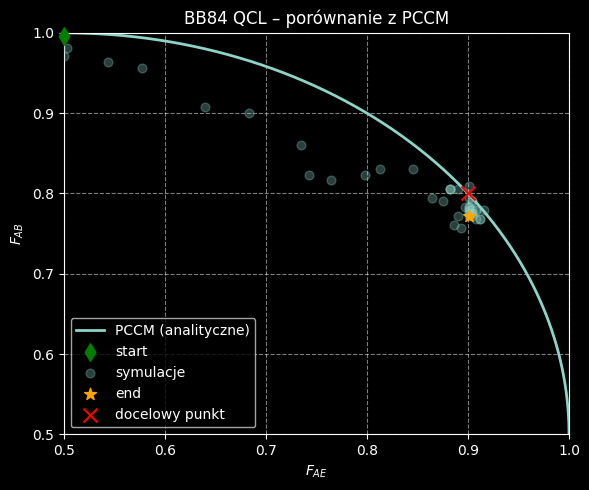

In [8]:
plt_fab_fae(b_q, e_q, 0.8)

# Krok 3 - trenowanie warstw Alice i Boba, Eve zamrożona
Próbujemy uczyć Alice i Boba z użyciem nowej funkcji straty, która maksymalizuje jedynie dokładność Boba.

In [9]:
eve_protocol.freeze_elements([eve])
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'AliceLayer_NU_W_U0[0]': np.float32(-0.107083656), 'AliceLayer_NU_W_U0[1]': np.float32(0.048278186), 'AliceLayer_NU_W_U0[2]': np.float32(-0.2526914), 'AliceLayer_NU_W_U1[0]': np.float32(1.0130825), 'AliceLayer_NU_W_U1[1]': np.float32(-1.6338352), 'AliceLayer_NU_W_U1[2]': np.float32(-0.119696975), 'AliceLayer_NU_W_weyl[0]': np.float32(0.09431864), 'AliceLayer_NU_W_weyl[1]': np.float32(-0.43424964), 'AliceLayer_NU_W_weyl[2]': np.float32(0.20088702), 'BobLayer_NU_W_U0[0]': np.float32(0.08479276), 'BobLayer_NU_W_U0[1]': np.float32(-0.74226516), 'BobLayer_NU_W_U0[2]': np.float32(1.040915), 'BobLayer_NU_W_U1[0]': np.float32(1.4159993), 'BobLayer_NU_W_U1[1]': np.float32(-0.031513304), 'BobLayer_NU_W_U1[2]': np.float32(-0.08986435), 'BobLayer_NU_W_weyl[0]': np.float32(0.055787902), 'BobLayer_NU_W_weyl[1]': np.float32(0.3603954), 'BobLayer_NU_W_weyl[2]': np.float32(-0.11166942)}
Frozen parameters: {'NU_W_0_0_U0[0]': np.float32(0.5120626), 'NU_W_0_0_U0[1]': np.float32(-0.2

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [10]:
eve_loss = eve_protocol.loss
eve_protocol.loss = ab_protocol.loss
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.2279411764705882), 'eve_qber': np.float64(0.09926470588235292)}
epoch: 0, loss: -0.79442298412323, QBER: {'bob_qber': np.float64(0.20220588235294112), 'eve_qber': np.float64(0.125)}
epoch: 5, loss: -0.8601465225219727, QBER: {'bob_qber': np.float64(0.12132352941176472), 'eve_qber': np.float64(0.23161764705882348)}
epoch: 10, loss: -0.8830595016479492, QBER: {'bob_qber': np.float64(0.12132352941176472), 'eve_qber': np.float64(0.3088235294117647)}
epoch: 15, loss: -0.8966742753982544, QBER: {'bob_qber': np.float64(0.11764705882352944), 'eve_qber': np.float64(0.43014705882352944)}
epoch: 20, loss: -0.9074835777282715, QBER: {'bob_qber': np.float64(0.07720588235294112), 'eve_qber': np.float64(0.4411764705882353)}
epoch: 25, loss: -0.935066819190979, QBER: {'bob_qber': np.float64(0.06985294117647056), 'eve_qber': np.float64(0.4411764705882353)}
epoch: 30, loss: -0.9404422640800476, QBER: {'bob_qber': np.float64(0.07720588235294112), 'eve_qber': np.float

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

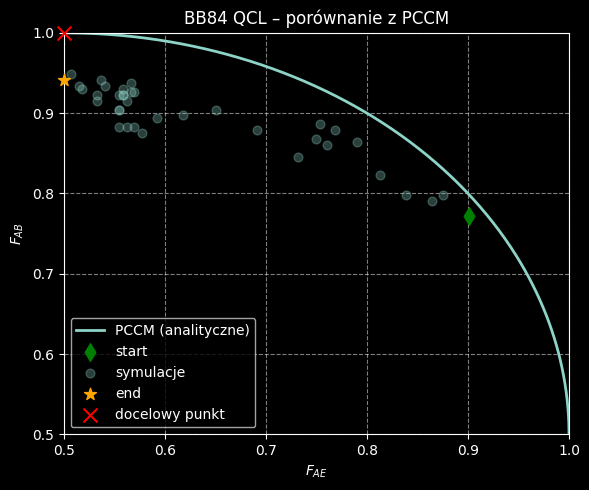

In [11]:
plt_fab_fae(b_q, e_q, 1)

In [12]:
eve_protocol.freeze_elements(layers)
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'NU_W_0_0_U0[0]': np.float32(0.5120626), 'NU_W_0_0_U0[1]': np.float32(-0.22517271), 'NU_W_0_0_U0[2]': np.float32(-0.36601558), 'NU_W_0_0_U1[0]': np.float32(-0.741727), 'NU_W_0_0_U1[1]': np.float32(0.043772385), 'NU_W_0_0_U1[2]': np.float32(0.65350074), 'NU_W_0_0_weyl[0]': np.float32(-0.53523225), 'NU_W_0_0_weyl[1]': np.float32(0.08507647), 'NU_W_0_0_weyl[2]': np.float32(0.14673145), 'NU_W_0_1_U0[0]': np.float32(-0.96691495), 'NU_W_0_1_U0[1]': np.float32(-0.945859), 'NU_W_0_1_U0[2]': np.float32(-3.632641e-09), 'NU_W_0_1_U1[0]': np.float32(1.6182754), 'NU_W_0_1_U1[1]': np.float32(0.9239305), 'NU_W_0_1_U1[2]': np.float32(-2.3988684e-09), 'NU_W_0_1_weyl[0]': np.float32(-0.8172327), 'NU_W_0_1_weyl[1]': np.float32(-0.43605942), 'NU_W_0_1_weyl[2]': np.float32(-0.27849877), 'NU_W_1_0_U0[0]': np.float32(-0.33953246), 'NU_W_1_0_U0[1]': np.float32(-0.4337249), 'NU_W_1_0_U0[2]': np.float32(-0.34064883), 'NU_W_1_0_U1[0]': np.float32(-0.9935265), 'NU_W_1_0_U1[1]': np.float32(-

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [13]:
eve_protocol.f_value = 0.8
eve_protocol.loss = eve_protocol.loss12
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.05882352941176472), 'eve_qber': np.float64(0.5036764705882353)}
epoch: 0, loss: -0.9702975749969482, QBER: {'bob_qber': np.float64(0.12132352941176472), 'eve_qber': np.float64(0.34191176470588236)}
epoch: 5, loss: -1.1555973291397095, QBER: {'bob_qber': np.float64(0.24264705882352944), 'eve_qber': np.float64(0.15441176470588236)}
epoch: 10, loss: -1.1695244312286377, QBER: {'bob_qber': np.float64(0.22058823529411764), 'eve_qber': np.float64(0.11764705882352944)}
epoch: 15, loss: -1.1870213747024536, QBER: {'bob_qber': np.float64(0.18014705882352944), 'eve_qber': np.float64(0.12867647058823528)}
epoch: 20, loss: -1.1894737482070923, QBER: {'bob_qber': np.float64(0.18382352941176472), 'eve_qber': np.float64(0.13602941176470584)}
epoch: 25, loss: -1.1982181072235107, QBER: {'bob_qber': np.float64(0.16911764705882348), 'eve_qber': np.float64(0.11397058823529416)}
epoch: 30, loss: -1.196596622467041, QBER: {'bob_qber': np.float64(0.17279411764705888), '

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

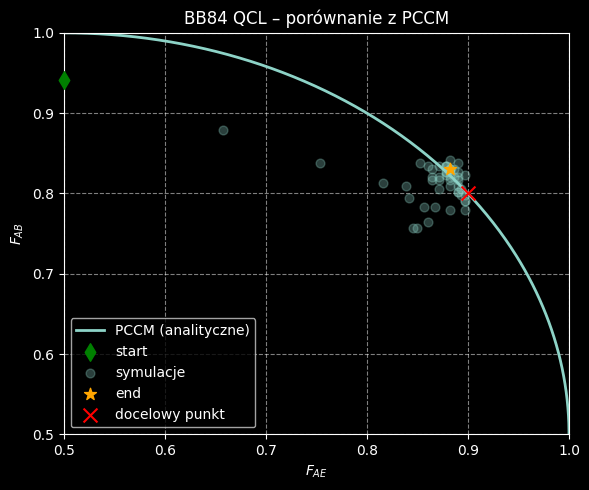

In [14]:
plt_fab_fae(b_q, e_q, 0.8)

In [15]:
eve_protocol.freeze_elements([eve])
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'AliceLayer_NU_W_U0[0]': np.float32(-0.9194036), 'AliceLayer_NU_W_U0[1]': np.float32(-0.37388596), 'AliceLayer_NU_W_U0[2]': np.float32(-1.2019463), 'AliceLayer_NU_W_U1[0]': np.float32(0.673157), 'AliceLayer_NU_W_U1[1]': np.float32(0.45007128), 'AliceLayer_NU_W_U1[2]': np.float32(-0.119696975), 'AliceLayer_NU_W_weyl[0]': np.float32(1.3365076), 'AliceLayer_NU_W_weyl[1]': np.float32(-0.46321347), 'AliceLayer_NU_W_weyl[2]': np.float32(0.54406536), 'BobLayer_NU_W_U0[0]': np.float32(-0.84997493), 'BobLayer_NU_W_U0[1]': np.float32(-0.22378245), 'BobLayer_NU_W_U0[2]': np.float32(1.9572065), 'BobLayer_NU_W_U1[0]': np.float32(2.2081602), 'BobLayer_NU_W_U1[1]': np.float32(-0.011500988), 'BobLayer_NU_W_U1[2]': np.float32(-0.17425634), 'BobLayer_NU_W_weyl[0]': np.float32(-0.14985102), 'BobLayer_NU_W_weyl[1]': np.float32(0.31635374), 'BobLayer_NU_W_weyl[2]': np.float32(0.019635586)}
Frozen parameters: {'NU_W_0_0_U0[0]': np.float32(0.84372866), 'NU_W_0_0_U0[1]': np.float32(0.01

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [16]:
eve_protocol.loss = ab_protocol.loss
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.16911764705882348), 'eve_qber': np.float64(0.11764705882352944)}
epoch: 0, loss: -0.803530216217041, QBER: {'bob_qber': np.float64(0.20588235294117652), 'eve_qber': np.float64(0.15808823529411764)}
epoch: 5, loss: -0.9260364770889282, QBER: {'bob_qber': np.float64(0.03676470588235292), 'eve_qber': np.float64(0.31985294117647056)}
epoch: 10, loss: -0.984348714351654, QBER: {'bob_qber': np.float64(0.007352941176470562), 'eve_qber': np.float64(0.5257352941176471)}
epoch: 15, loss: -0.9772447943687439, QBER: {'bob_qber': np.float64(0.022058823529411797), 'eve_qber': np.float64(0.5735294117647058)}
epoch: 20, loss: -0.9771028161048889, QBER: {'bob_qber': np.float64(0.022058823529411797), 'eve_qber': np.float64(0.5735294117647058)}
epoch: 25, loss: -0.989525318145752, QBER: {'bob_qber': np.float64(0.007352941176470562), 'eve_qber': np.float64(0.5514705882352942)}
epoch: 30, loss: -0.9869717955589294, QBER: {'bob_qber': np.float64(0.003676470588235281), '

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

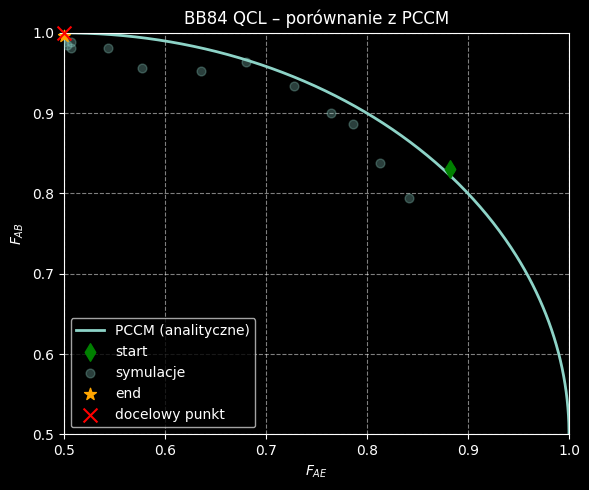

In [17]:
plt_fab_fae(b_q, e_q, 1)

In [18]:
print("All parameters:", eve_protocol.get_all_parameters())

All parameters: {'NU_W_0_0_U0[0]': np.float32(0.84372866), 'NU_W_0_0_U0[1]': np.float32(0.017416913), 'NU_W_0_0_U0[2]': np.float32(-0.50753397), 'NU_W_0_0_U1[0]': np.float32(-0.76860094), 'NU_W_0_0_U1[1]': np.float32(-0.25754753), 'NU_W_0_0_U1[2]': np.float32(0.384689), 'NU_W_0_0_weyl[0]': np.float32(-0.7806656), 'NU_W_0_0_weyl[1]': np.float32(-0.17676838), 'NU_W_0_0_weyl[2]': np.float32(0.39416498), 'NU_W_0_1_U0[0]': np.float32(-1.0668546), 'NU_W_0_1_U0[1]': np.float32(-0.6290013), 'NU_W_0_1_U0[2]': np.float32(-3.632641e-09), 'NU_W_0_1_U1[0]': np.float32(1.7320042), 'NU_W_0_1_U1[1]': np.float32(1.0313405), 'NU_W_0_1_U1[2]': np.float32(-2.3988684e-09), 'NU_W_0_1_weyl[0]': np.float32(-0.92355424), 'NU_W_0_1_weyl[1]': np.float32(-0.46678567), 'NU_W_0_1_weyl[2]': np.float32(-0.32919714), 'NU_W_1_0_U0[0]': np.float32(-0.57737756), 'NU_W_1_0_U0[1]': np.float32(-0.13576555), 'NU_W_1_0_U0[2]': np.float32(-0.1723824), 'NU_W_1_0_U1[0]': np.float32(-0.02121369), 'NU_W_1_0_U1[1]': np.float32(-1.1

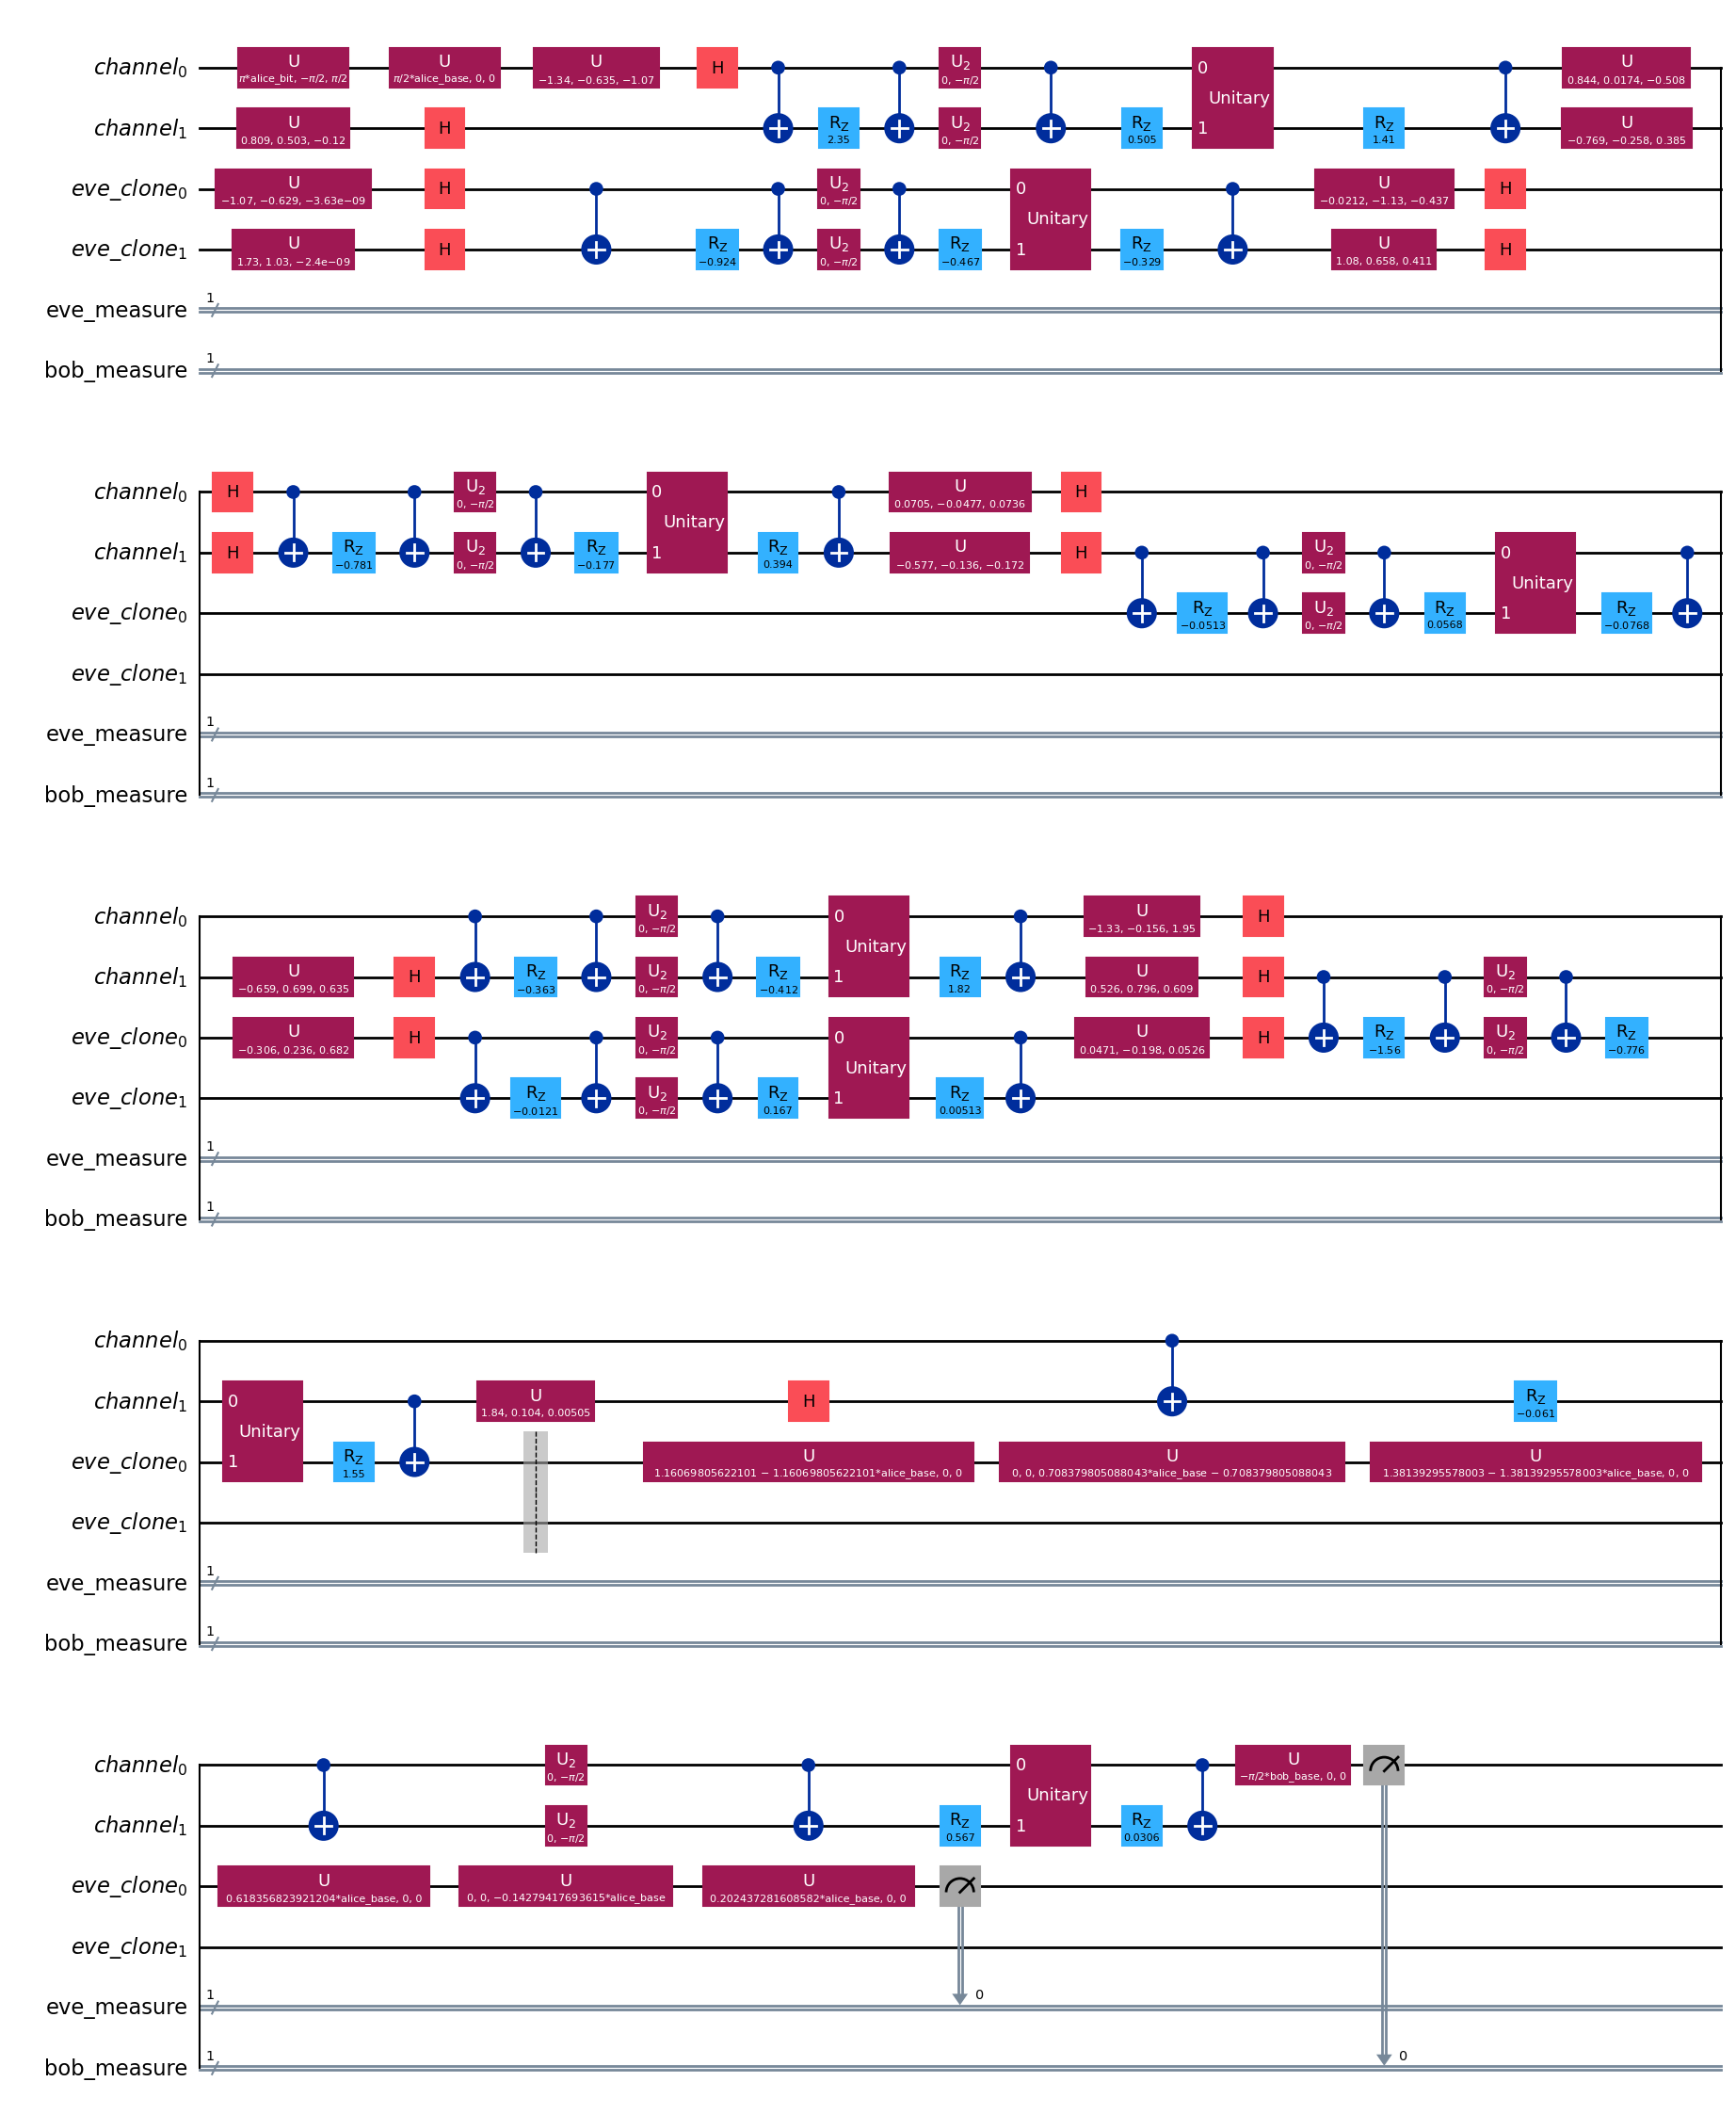

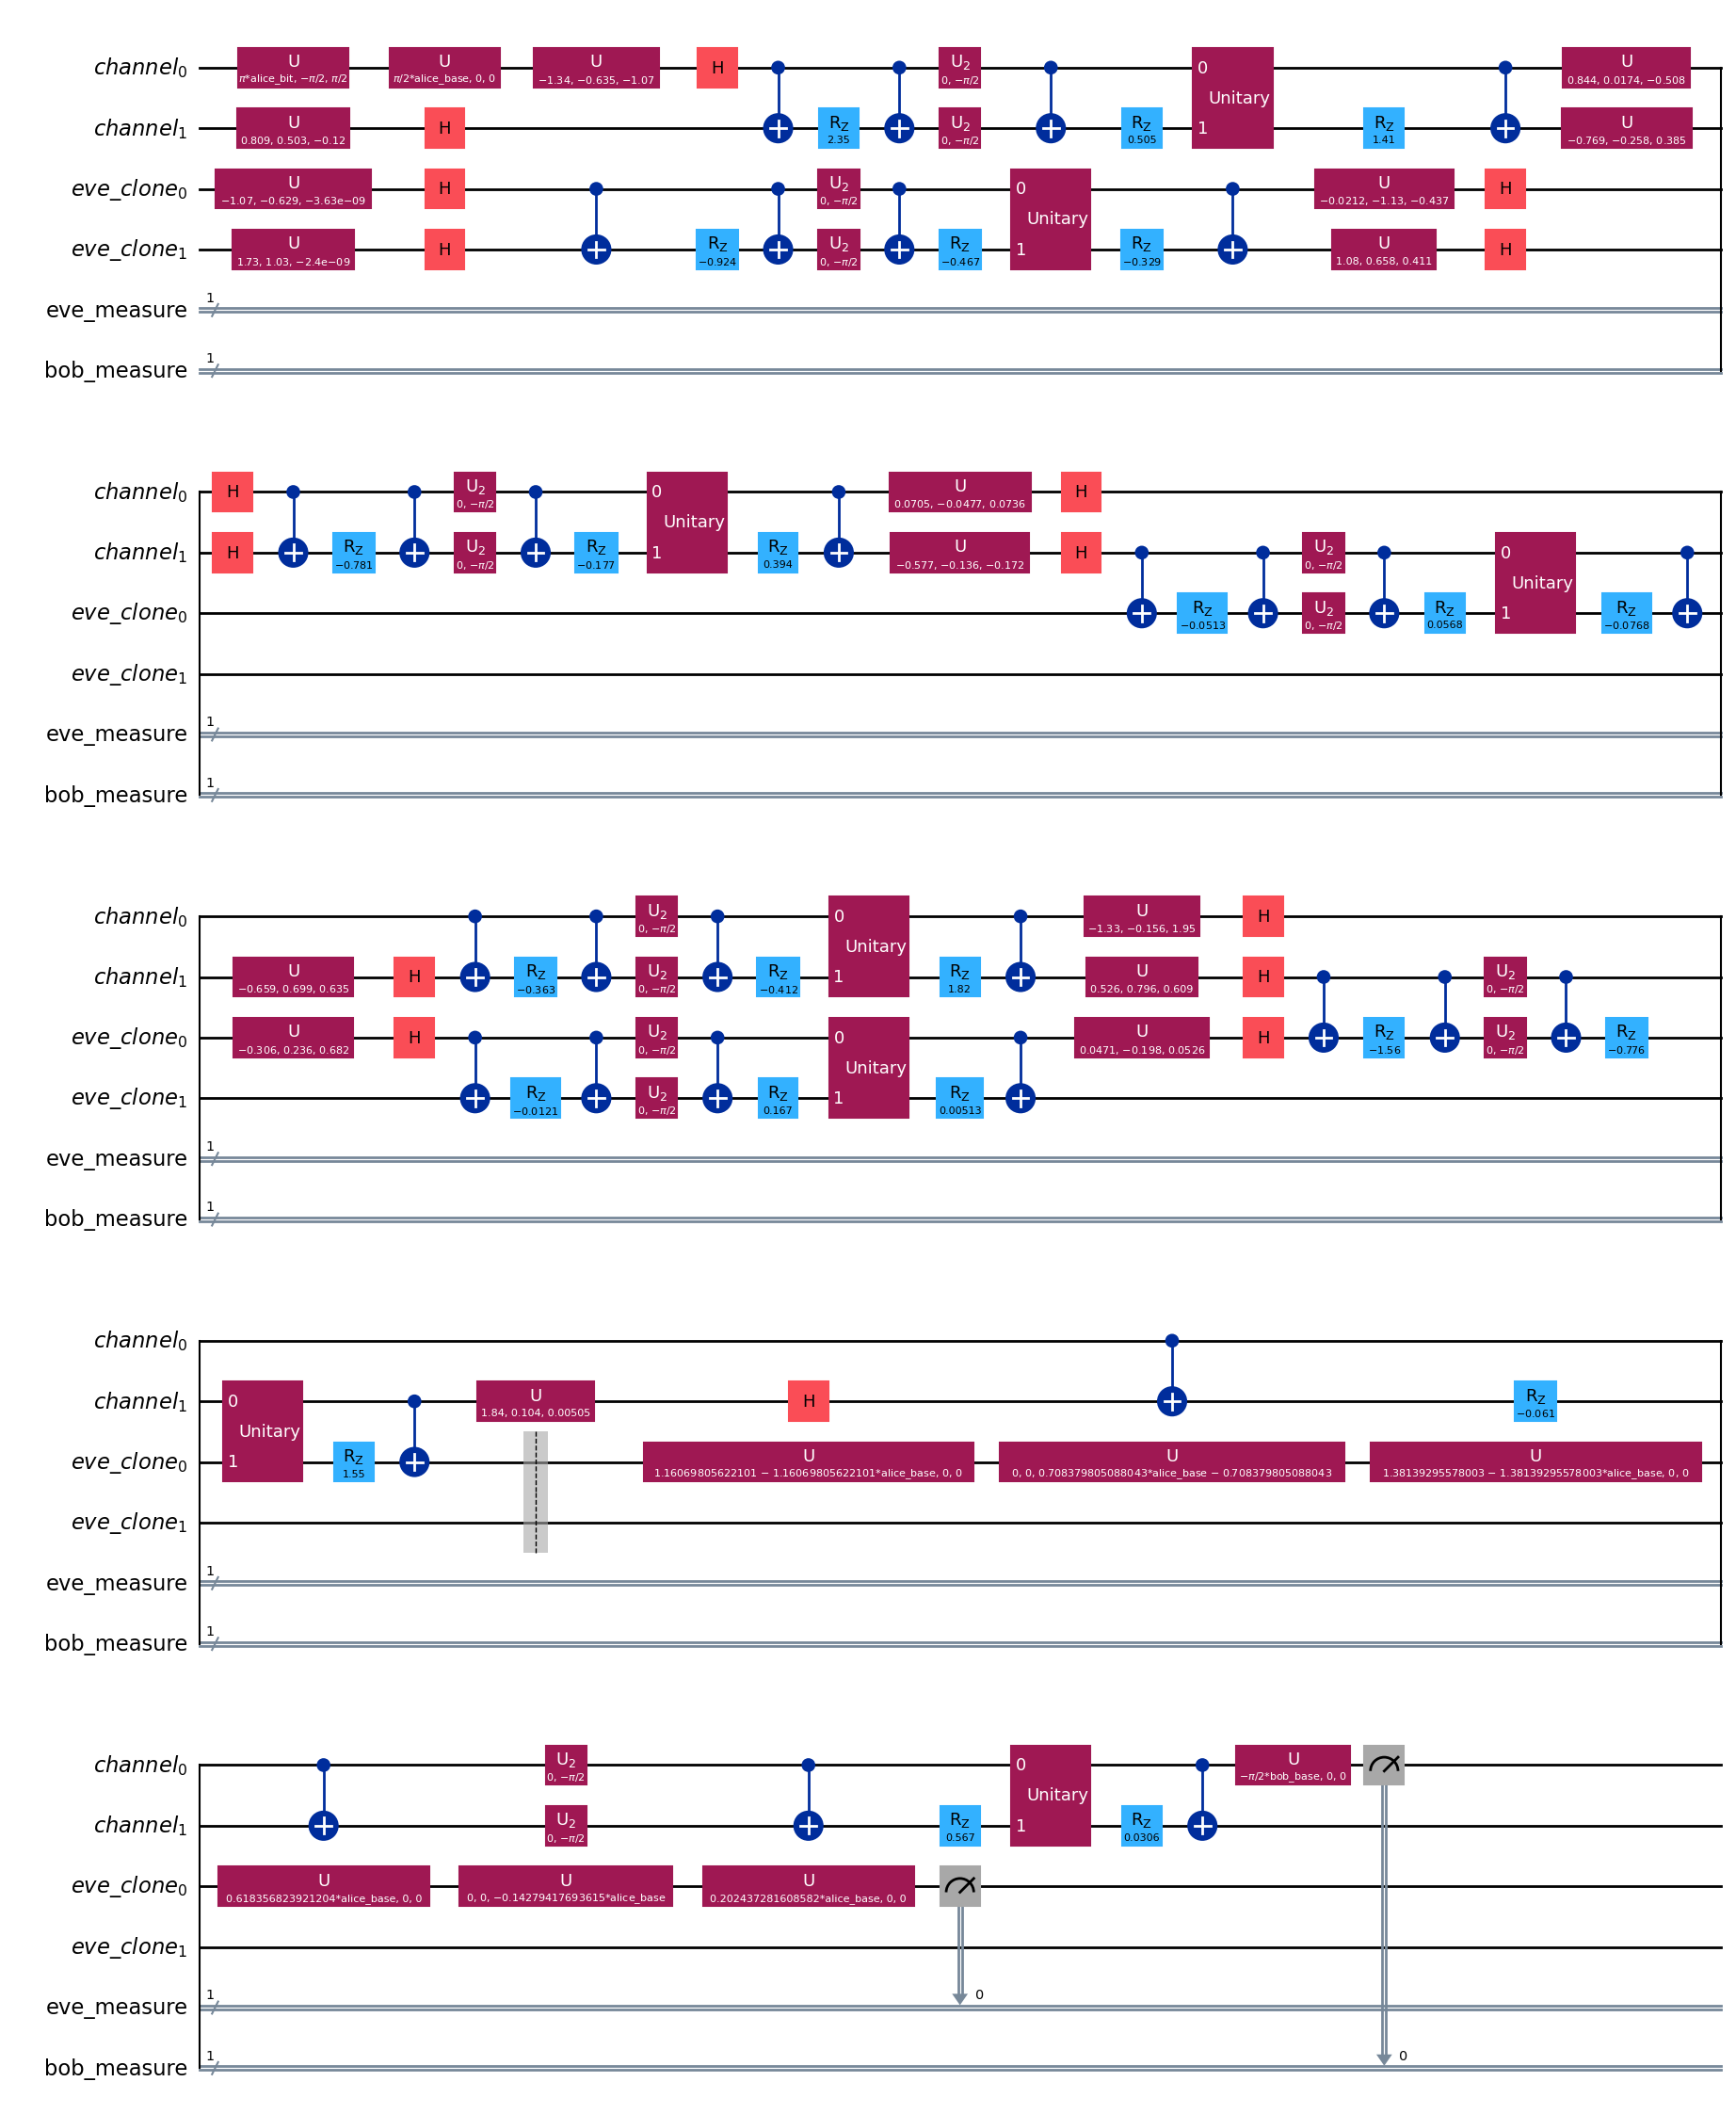

In [19]:
eve_protocol._qc.assign_parameters(eve_protocol.get_all_parameters()).draw("mpl")